In [1]:
# import packages
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

In [2]:
# connect to sqlite database
con = sqlite3.connect('atsm.db')

In [3]:
# sql query
query_1 = """
select * from adult_log_regression_table 
"""

query_2 = """
select * from child_log_regression_table 
"""

In [4]:
# read sql query to pd dataframe
adult_reg_table = pd.read_sql_query(query_1, con)
child_reg_table = pd.read_sql_query(query_2, con)

#close connection to database
con.close()

In [5]:
# data processing
adult_reg_table['gender'] = adult_reg_table['gender'].astype(str).str.lower()
adult_reg_table['gender'] = adult_reg_table['gender'].str.strip()

adult_reg_table['autism'] = adult_reg_table['autism'].astype(str).str.lower()
adult_reg_table['autism'] = adult_reg_table['autism'].str.strip()

adult_reg_table['ethnicity'] = adult_reg_table['ethnicity'].str.lower()
adult_reg_table['ethnicity'] = adult_reg_table['ethnicity'].str.replace(' ', '_')

child_reg_table['gender'] = child_reg_table['gender'].astype(str).str.lower()
child_reg_table['gender'] = child_reg_table['gender'].str.strip()

child_reg_table['autism'] = child_reg_table['autism'].astype(str).str.lower()
child_reg_table['autism'] = child_reg_table['autism'].str.strip()

child_reg_table['ethnicity'] = child_reg_table['ethnicity'].str.lower()
child_reg_table['ethnicity'] = child_reg_table['ethnicity'].str.replace(' ', '_')

In [6]:
# process adult dataframe
adult_reg_table['autism'] = adult_reg_table['autism'].map({'no': 0, 'yes': 1})
adult_reg_table = pd.get_dummies(adult_reg_table, columns=['gender'], prefix=['gender'])

adult_reg_table = pd.get_dummies(adult_reg_table, columns=['ethnicity'], prefix=['ethnicity'])

adult_reg_table['age'] = pd.to_numeric(adult_reg_table['age'])

# process child dataframe
child_reg_table['autism'] = child_reg_table['autism'].map({'no': 0, 'yes': 1})
child_reg_table = pd.get_dummies(child_reg_table, columns=['gender'], prefix=['gender'])

child_reg_table = pd.get_dummies(child_reg_table, columns=['ethnicity'], prefix=['ethnicity'])

child_reg_table['age'] = pd.to_numeric(child_reg_table['age'])


In [7]:
# Create logistic regression for adult table 

# create adult table copy
adult_reg_table_copy = adult_reg_table.copy()

# Define independent variables
X = adult_reg_table_copy[['age', 'gender_f', 'gender_m', 'ethnicity_asian', 'ethnicity_black', 
                         'ethnicity_hispanic', 'ethnicity_latino', 'ethnicity_middle_eastern_', 
                         'ethnicity_others', 'ethnicity_pasifika', 'ethnicity_south_asian', 
                         'ethnicity_turkish', 'ethnicity_white-european']]

# define dependent variable
y = adult_reg_table_copy['autism']

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create log regression model
log_adult_model = LogisticRegression()

# fit model on training data
log_adult_model.fit(X_train, y_train)

# test model on testing data
adult_score = log_adult_model.score(X_test, y_test)
print('Model accuracy is', adult_score)

# perform cross validation
adult_cross_val_scores = cross_val_score(log_adult_model, X, y, cv=5)
print('Cross-validation scores:', adult_cross_val_scores)
print('Average cross_validation score:', adult_cross_val_scores.mean())

Model accuracy is 0.8688524590163934
Cross-validation scores: [0.85245902 0.86065574 0.86065574 0.8442623  0.85950413]
Average cross_validation score: 0.8555073838233301


/Users/rahuldmello/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rahuldmello/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

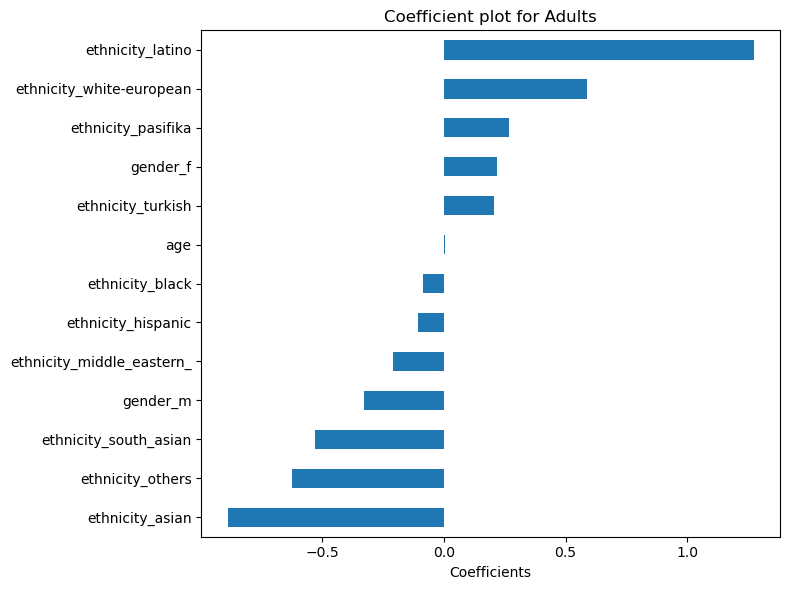

In [8]:
# Create Coefficients plot for adults
adult_coefficients = pd.Series(log_adult_model.coef_[0], index=X.columns)
plt.figure(figsize=(8,6))
adult_coefficients.sort_values().plot(kind='barh')
plt.xlabel('Coefficients')
plt.title('Coefficient plot for Adults')
plt.tight_layout()
plt.savefig('coefficients_plot_adult.png')
plt.show()

In [9]:
# Create logistic regression for child table 

# create adult table copy
child_reg_table_copy = child_reg_table.copy()

# Define independent variables
x = child_reg_table_copy[['age', 'gender_f', 'gender_m', 'ethnicity_asian', 'ethnicity_black', 
                         'ethnicity_hispanic', 'ethnicity_latino', 'ethnicity_middle_eastern_', 
                         'ethnicity_others', 'ethnicity_pasifika', 'ethnicity_south_asian', 
                         'ethnicity_turkish', 'ethnicity_white-european']]

# define dependent variable
Y = child_reg_table_copy['autism']

# split into training and test sets
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

# create log regression model
log_child_model = LogisticRegression()

# fit model on testing data
log_child_model.fit(x_train, Y_train)

# test model on testing data
child_score = log_child_model.score(x_test, Y_test)
print("Model accuracy is", child_score)

# perform cross_validation
child_cross_val_scores = cross_val_score(log_child_model, x, Y, cv=5)
print('Cross-validation scores:', child_cross_val_scores)
print('Average cross_validation score:', child_cross_val_scores.mean())

Model accuracy is 0.84
Cross-validation scores: [0.82       0.82       0.82       0.81632653 0.7755102 ]
Average cross_validation score: 0.8103673469387754


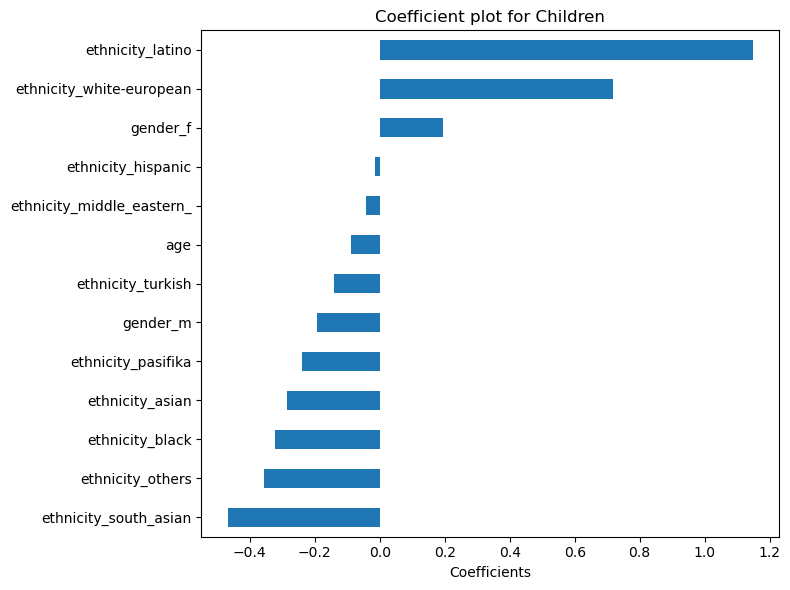

In [10]:
# Create Coefficients plot for adults
child_coefficients = pd.Series(log_child_model.coef_[0], index=x.columns)
plt.figure(figsize=(8,6))
child_coefficients.sort_values().plot(kind='barh')
plt.xlabel('Coefficients')
plt.title('Coefficient plot for Children')
plt.tight_layout()
plt.savefig('coefficient_plot_child.png')
plt.show()